In [1]:
import torch
from torch import nn
from src.conf.config import CONFIG
from src.dl.inferer import Inferer
from src.dl.lightning_model import SegModel
from src.dl.model_builder import ModelBuilder

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
# get the config file
config = CONFIG

# Set the model to do instance or panoptic segmentation (depends what's in the config.py file)
base_model = ModelBuilder.set_model("Unet", config)

# Insert the model to pytorch lightning framework. (Simplifies the training and other stuff)
lightning_model = SegModel.from_conf(base_model, config)

ckpt = lightning_model.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
lightning_model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(lightning_model, config)

In [4]:
inf.run_predictions_all()

Prediction for: test_1
/home/leos/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.

Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [5]:
inf.post_process()

/home/leos/.local/lib/python3.6/site-packages/skimage/util/dtype.py:525: UserWarning:

Downcasting int32 to uint8 without scaling because max value 1 fits in uint8



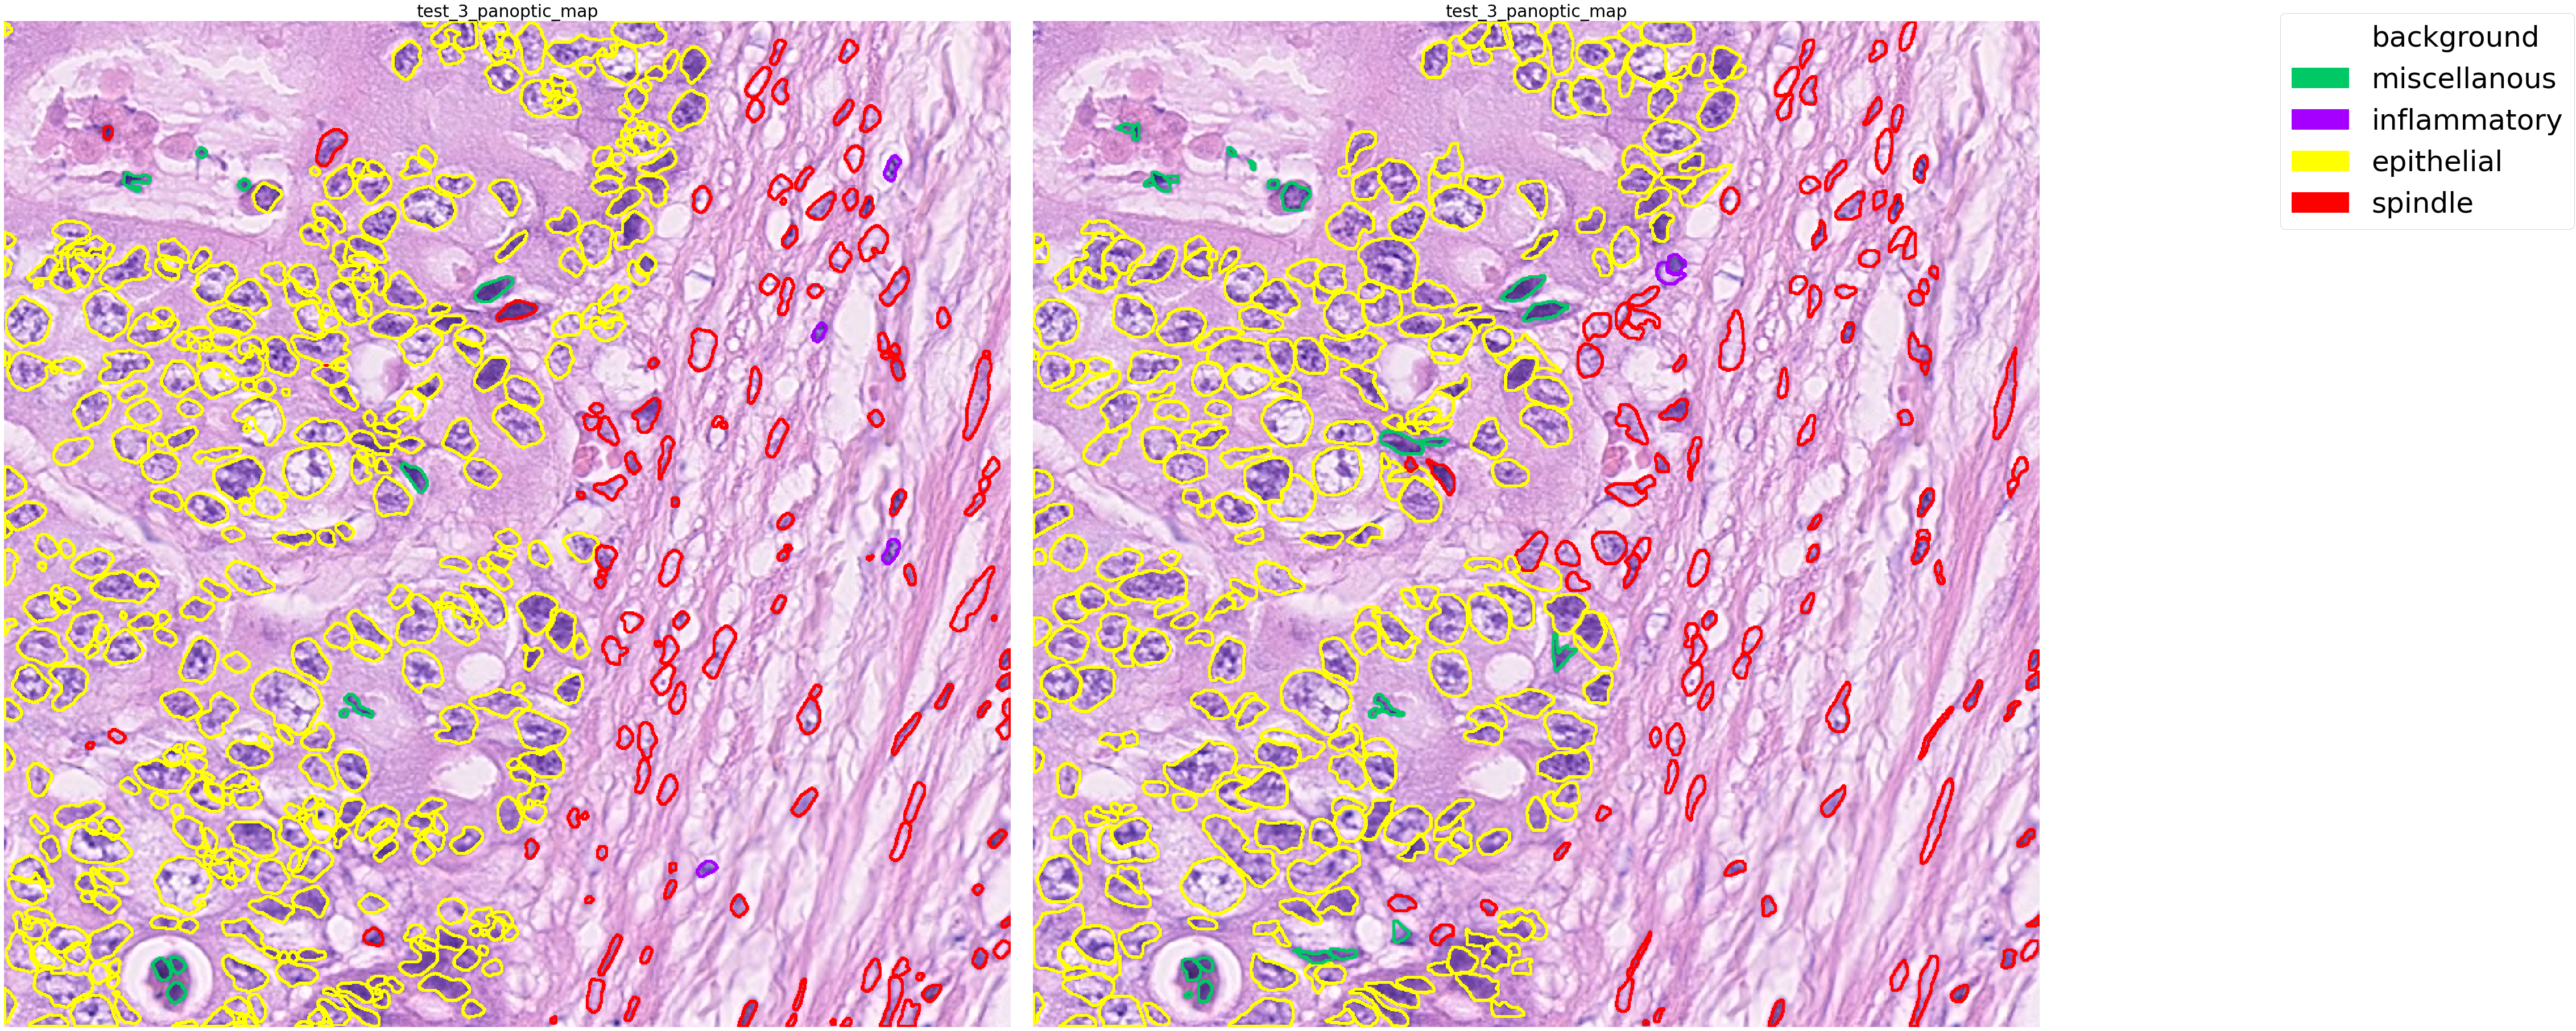

In [6]:
inf.plot_outputs("panoptic_maps", ixs = [7], contour=True, gt_mask=True)

In [7]:
score_dfs = inf.run_benchmarks(save=True)

In [8]:
score_dfs["instance_metrics"]

AJI  AJI_plus     DICE2        PQ        SQ  \
test_1_metrics        0.482015  0.533730  0.489305  0.509202  0.694673   
test_10_metrics       0.540353  0.569775  0.520027  0.563293  0.736484   
test_11_metrics       0.420322  0.490474  0.460311  0.365420  0.667941   
test_12_metrics       0.603209  0.632258  0.637021  0.574687  0.732345   
test_13_metrics       0.527104  0.579454  0.649003  0.544336  0.734574   
test_14_metrics       0.573504  0.580514  0.647444  0.551653  0.756424   
test_2_metrics        0.504518  0.510330  0.645805  0.431708  0.688677   
test_3_metrics        0.535877  0.559928  0.467548  0.459244  0.718470   
test_4_metrics        0.528289  0.550125  0.457756  0.441387  0.717797   
test_5_metrics        0.498497  0.546662  0.512170  0.527021  0.719380   
test_6_metrics        0.594658  0.624300  0.685257  0.577880  0.739491   
test_7_metrics        0.448164  0.477840  0.619283  0.409183  0.659972   
test_8_metrics        0.427757  0.477022  0.381290  0.410033  0.691060   
test_9_metrics        0.526264  0.564758  0.637975  0.557795  0.719980   
averages_for_the_set  0.515038  0.549798  0.557871  0.494489  0.712662   

                            DQ  inst_Sensitivity  inst_Precision    splits  \
test_1_metrics        0.733010          0.698266        0.771392  0.628088   
test_10_metrics       0.764840          0.792899        0.738699  0.917475   
test_11_metrics       0.547085          0.453110        0.690240  0.733121   
test_12_metrics       0.784722          0.792056        0.777523  0.482947   
test_13_metrics       0.741022          0.645327        0.870040  0.725932   
test_14_metrics       0.729290          0.886691        0.619347  1.324442   
test_2_metrics        0.626866          0.771429        0.527933  0.537320   
test_3_metrics        0.639198          0.728426        0.569444  0.584150   
test_4_metrics        0.614919          0.729665        0.531359  0.780054   
test_5_metrics        0.732605          0.700000        0.768396  0.787279   
test_6_metrics        0.781457          0.786667        0.776316  0.399855   
test_7_metrics        0.620000          0.514523        0.779874  0.158439   
test_8_metrics        0.593338          0.611821        0.575940  0.803280   
test_9_metrics        0.774737          0.717349        0.842105  0.331385   
averages_for_the_set  0.691649          0.702016        0.702758  0.656698   

                        merges  
test_1_metrics        0.791065  
test_10_metrics       0.545052  
test_11_metrics       0.953143  
test_12_metrics       0.366452  
test_13_metrics       0.891565  
test_14_metrics       0.373002  
test_2_metrics        0.424870  
test_3_metrics        0.683562  
test_4_metrics        0.701109  
test_5_metrics        1.064773  
test_6_metrics        0.244499  
test_7_metrics        0.209515  
test_8_metrics        0.890763  
test_9_metrics        0.438543  
averages_for_the_set  0.612708

In [9]:
df = score_dfs["type_metrics"].rename_axis("fn").reset_index()
df[df.fn.str.contains("avg")]

fn       AJI  AJI_plus     DICE2        PQ  \
14   miscellanous_avg_for_the_set  0.140459  0.142989  0.430604   0.14332   
43   inflammatory_avg_for_the_set  0.266827  0.269668  0.595092  0.302864   
86     epithelial_avg_for_the_set   0.32832  0.340263  0.558694   0.34255   
143       spindle_avg_for_the_set  0.337448  0.349097  0.579161  0.346099   

           SQ        DQ inst_Sensitivity inst_Precision     splits     merges  
14   0.402893  0.200567         0.153887           0.35  0.0142706  0.0746311  
43   0.570791  0.393084         0.366325       0.498042  0.0615185  0.0895579  
86   0.609809  0.457781         0.454262       0.524061   0.212367   0.202764  
143  0.635903  0.474438           0.4834       0.519275   0.243932   0.234211